In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("diabetes_data.csv")

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [52]:
df.shape

(768, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    float64
 1   Glucose                   722 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  734 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,722.000000,735.000000,726.000000,735.000000,729.000000,734.000000,735.000000,739.000000
mean,3.912088,120.671745,68.927891,20.632231,80.268027,32.028807,0.467578,33.308844,0.341001
std,3.382204,31.982858,19.590744,16.012616,116.198612,7.904681,0.325979,11.727195,0.474367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.238250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,130.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
df.isnull().sum()

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64

In [56]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                47
SkinThickness                51
Insulin                     181
BMI                         245
DiabetesPedigreeFunction    504
Age                          52
Outcome                       2
dtype: int64

In [57]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
missing_numerical_cols = [col for col in numerical_cols if df[col].isnull().sum() > 0]

missing_numerical_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# Filling The Missing Values for Glucose

### 1. Visual Methods (First and Most Intuitive)

#### A. Histogram + KDE

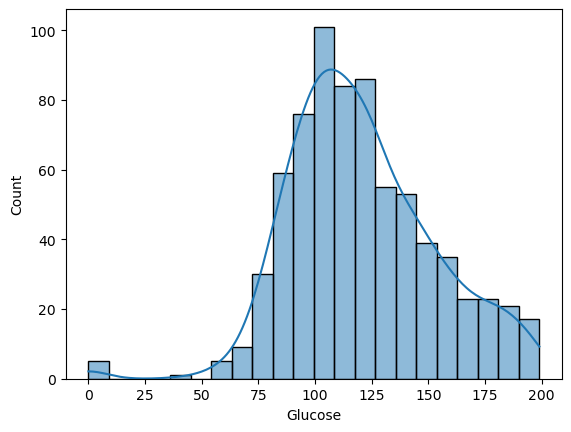

In [58]:
sns.histplot(df["Glucose"],kde=True)
plt.show()

Interpretation

Bell-shaped and symmetric → approximately normal

Long tail to the right → right skewed

Long tail to the left → left skewed

#### B. Box Plot (Outlier Detection)

<function matplotlib.pyplot.show(close=None, block=None)>

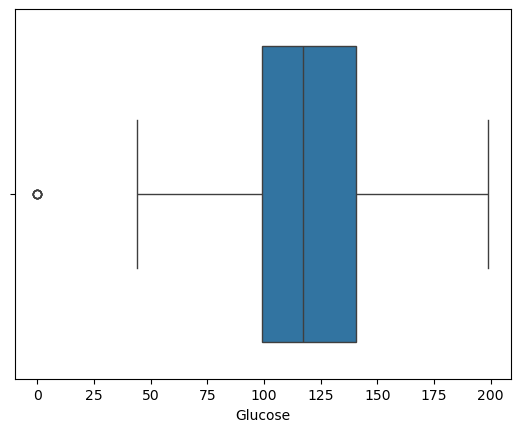

In [59]:
sns.boxplot(x=df["Glucose"])
plt.show

Interpretation

Many points far from the box → outliers

Median not centered → skewed distribution

### 2. Statistical Measures (Quantitative Evidence)

#### A. Skewness Value (Most Important)

In [60]:
df['Glucose'].skew()

np.float64(0.15758158664483043)

| Skewness Value | Interpretation          |
| -------------- | ----------------------- |
| ≈ 0            | Symmetric / Normal      |
| 0.5 to 1       | Moderately right skewed |
| > 1            | Highly right skewed     |
| -0.5 to -1     | Moderately left skewed  |
| < -1           | Highly left skewed      |


In [61]:
df['Glucose'].mean(), df['Glucose'].median()

(np.float64(120.67174515235457), 117.0)

| Case          | Interpretation |
| ------------- | -------------- |
| Mean ≈ Median | Normal         |
| Mean > Median | Right skewed   |
| Mean < Median | Left skewed    |

# 3. Formal Statistical Tests (Optional but Strong)

### Shapiro–Wilk Test

In [62]:
from scipy.stats import shapiro
stat, p = shapiro(df['Glucose'].dropna())
p

np.float64(4.3371158410057273e-11)

Interpretation

p > 0.05 → approximately normal

p ≤ 0.05 → not normal

Note: For large datasets, this test almost always rejects normality.

### “To check normality and skewness, I first visualize the distribution using histograms and box plots. I then compute skewness and compare the mean and median. If needed, I validate using Q–Q plots or the Shapiro–Wilk test. Based on these observations, I choose mean for normal distributions and median for skewed distributions with outliers.”

In [73]:
df['Glucose'] = df['Glucose'].fillna(value = df['Glucose'].median())

In [74]:
df['Glucose'].isnull().sum()

np.int64(0)

# Filling missing values in Pregnancies

In [75]:
df['Pregnancies'].isnull().sum()

np.int64(40)

<function matplotlib.pyplot.show(close=None, block=None)>

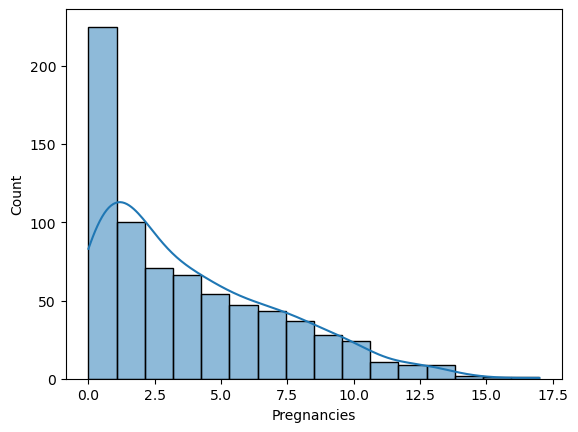

In [76]:
sns.histplot(x=df['Pregnancies'],kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

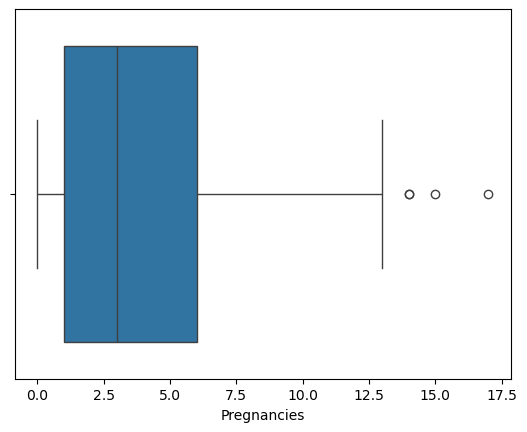

In [77]:
sns.boxplot(x=df['Pregnancies'])
plt.show

In [78]:
df['Pregnancies'].skew()

np.float64(0.8778422362542826)

In [79]:
df['Pregnancies'].mean(),df['Pregnancies'].median()

(np.float64(3.912087912087912), 3.0)

The Pregnancies feature exhibits a moderately right-skewed distribution, as indicated by a skewness value of 0.88 and a mean greater than the median. The presence of higher-value outliers can bias the mean. Therefore, median imputation is preferred as it is more robust and better represents the central tendency.

In [80]:
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].median())

In [81]:
df['Pregnancies'].isnull().sum()

np.int64(0)